In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("eksikveriler.csv")

In [3]:
df.isnull().sum()

ulke        0
boy         0
kilo        0
yas         2
cinsiyet    0
dtype: int64

In [4]:
mean_value = df["yas"].mean()

In [5]:
mean_value

28.45

In [6]:
df["yas"].fillna(mean_value, inplace=True)

In [7]:
df.isnull().sum()

ulke        0
boy         0
kilo        0
yas         0
cinsiyet    0
dtype: int64

In [8]:
df.value_counts("ulke")

ulke
tr    9
fr    7
us    6
dtype: int64

In [9]:
d = {"tr":1 , "fr":2 , "us":3}
df["ulke"] = df["ulke"].map(d)
e = {"e":0 , "k":1}
df["cinsiyet"] = df["cinsiyet"].map(e)

In [10]:
df = pd.get_dummies(df,columns=["ulke"])

In [11]:
y = df["cinsiyet"].values
x = df.drop("cinsiyet", axis=1).values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=19)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [22]:
y_test

array([0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [23]:
y1 = df["boy"].values
x1 = df.drop("boy", axis=1).values

In [24]:
y1

array([130, 125, 135, 133, 129, 180, 190, 175, 177, 185, 165, 155, 160,
       162, 167, 174, 193, 187, 183, 159, 164, 166], dtype=int64)

In [25]:
x1_train, x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.33, random_state=19)

In [26]:
x1_train = sc.fit_transform(x1_train)
x1_test = sc.fit_transform(x1_test)

In [27]:
lr1 = LinearRegression()

In [28]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [29]:
y1_pred = lr1.predict(x1_test)

In [30]:
y1_pred

array([167.21012926, 163.09671616, 143.23274904, 151.78243262,
       178.63152781, 146.14777428, 164.24014945, 218.80137853])

In [31]:
y1_test

array([174, 155, 129, 159, 160, 133, 166, 185], dtype=int64)

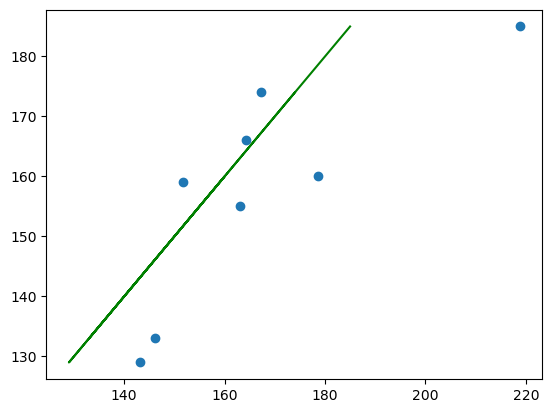

In [32]:
plt.plot(y1_test,y1_test,"g")
plt.scatter(y1_pred,y1_test)

In [33]:
df

,boy,kilo,yas,cinsiyet,ulke_1,ulke_2,ulke_3
0,130,30,10.00,0,1,0,0
1,125,36,11.00,0,1,0,0
2,135,34,10.00,1,1,0,0
3,133,30,9.00,1,1,0,0
4,129,38,12.00,0,1,0,0
5,180,90,30.00,0,1,0,0
6,190,80,25.00,0,1,0,0
7,175,90,35.00,0,1,0,0
8,177,60,22.00,1,1,0,0
9,185,105,33.00,0,0,0,1


In [34]:
import statsmodels.api as sm

In [35]:
X = np.append(arr=np.ones((22,1)).astype(int), values=x1, axis=1)

In [36]:
X

array([[  1.  ,  30.  ,  10.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  36.  ,  11.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  34.  ,  10.  ,   1.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  30.  ,   9.  ,   1.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  38.  ,  12.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  90.  ,  30.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  80.  ,  25.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  90.  ,  35.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  60.  ,  22.  ,   1.  ,   1.  ,   0.  ,   0.  ],
       [  1.  , 105.  ,  33.  ,   0.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  55.  ,  27.  ,   1.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  50.  ,  44.  ,   1.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  58.  ,  28.45,   1.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  59.  ,  41.  ,   1.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  62.  ,  55.  ,   1.  ,   0.  ,   0.  ,   1.  ],
       [  1.  ,  70.  ,  

In [37]:
X_l = df.iloc[:,[0,1,2,3,4,5]].values

In [38]:
X_l = np.array(X_l, dtype=float)

In [39]:
model = sm.OLS(y1,X_l).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.625e+29
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                   3.76e-235
Time:                        19:57:46   Log-Likelihood:                          603.93
No. Observations:                  22   AIC:                                     -1196.
Df Residuals:                      16   BIC:                                     -1189.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   4.47e-15   2.24e+14      0.000       1.000       1.000
x2         -1.305e-15   7.87e-15     -0.166      0.870    -1.8e-14    1.54e-14
x3         -1.332e-15   9.24e-15     -0.144      0.887   -2.09e-14    1.83e-14
x4         -8.171e-14   2.32e-13     -0.353      0.729   -5.72e-13    4.09e-13
x5          7.105e-15   2.59e-13      0.027      0.978   -5.42e-13    5.56e-13
x6          2.487e-14   2.22e-13      0.112      0.912   -4.45e-13    4.95e-13
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.714
Skew:                          -0.490   Prob(JB):                        0.424
Kurtosis:                       2.046   Cond. No.                         840.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y1

array([130, 125, 135, 133, 129, 180, 190, 175, 177, 185, 165, 155, 160,
       162, 167, 174, 193, 187, 183, 159, 164, 166], dtype=int64)

In [42]:
X_l = df.iloc[:,[0,1,2,3]].values

In [43]:
X_l = np.array(X_l, dtype=float)

In [44]:
model = sm.OLS(y1,X_l).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.663e+31
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                   7.25e-279
Time:                        19:57:48   Log-Likelihood:                          642.07
No. Observations:                  22   AIC:                                     -1276.
Df Residuals:                      18   BIC:                                     -1272.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   4.69e-16   2.13e+15      0.000       1.000       1.000
x2         -2.442e-15   1.16e-15     -2.106      0.049   -4.88e-15   -6.37e-18
x3         -1.332e-15   1.29e-15     -1.035      0.314   -4.04e-15    1.37e-15
x4         -7.816e-14   3.43e-14     -2.280      0.035    -1.5e-13   -6.14e-15
==============================================================================
Omnibus:                        0.777   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.719
Skew:                          -0.139   Prob(JB):                        0.698
Kurtosis:                       2.159   Cond. No.                         510.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""